In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Conv1D, MaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing import sequence

# Set parameters
max_features = 5000
max_length = 500
embedding_dim = 50
lstm_units = 64
dropout_rate = 0.5
filters = 64
kernel_size = 5
pool_size = 2
batch_size = 64
epochs = 5

# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to a fixed length
x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)

# Build the model
model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=max_length))
model.add(Dropout(dropout_rate))
model.add(Conv1D(filters, kernel_size, activation='relu'))
model.add(MaxPooling1D(pool_size))
model.add(LSTM(lstm_units))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Calculate train accuracy
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print('Train Loss:', train_loss)
print('Train Accuracy:', train_accuracy)

# Make predictions
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob >= 0.5).astype(int)
y_test = (y_test >= 0.5).astype(int)




2023-05-20 23:36:36.023677: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-20 23:36:42.122141: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
391/391 [==============================] - 70s 177ms/step - loss: 0.4246 - accuracy: 0.7923 - val_loss: 0.3147 - val_accuracy: 0.8692
Epoch 2/5
391/391 [==============================] - 71s 183ms/step - loss: 0.2562 - accuracy: 0.8984 - val_loss: 0.2827 - val_accuracy: 0.8806
Epoch 3/5
391/391 [==============================] - 71s 181ms/step - loss: 0.2132 - accuracy: 0.9182 - val_loss: 0.2837 - val_accuracy: 0.8834
Epoch 4/5
391/391 [==============================] - 74s 189ms/step - loss: 0.1878 - accuracy: 0.9296 - val_loss: 0.2790 - val_accuracy: 0.8852
Epoch 5/5
782/782 [==============================] - 24s 30ms/step - loss: 0.2868 - accuracy: 0.8876
Test Loss: 0.2868313193321228
Test Accuracy: 0.8876399993896484
782/782 [==============================] - 23s 29ms/step - loss: 0.1113 - accuracy: 0.9674
Train Loss: 0.11132519692182541
Train Accuracy: 0.9674000144004822
782/782 [==============================] - 24s 30ms/step


Accuracy: 0.88764
Precision: 0.8896662645757941
Recall: 0.88504
F1 Score: 0.8873471024664127


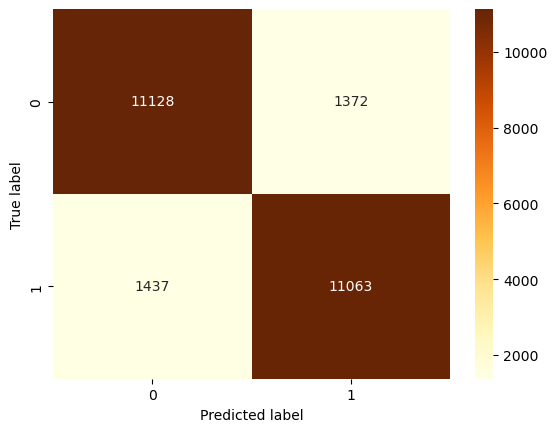

In [9]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print classification metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='YlOrBr', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()